In [88]:
from pyproj import Proj, transform
from shapely.geometry import Polygon, Point
import geopandas as gpd
import folium
import matplotlib.pyplot as plt



EPSG1 = Proj(init='epsg:29193')
EPSG2 = Proj(init='epsg:4618')
POLY = {'init': 'epsg:4618'}

In [3]:
# SELECT ST_AsText(
# 	ST_Transform(
# 		ST_GeomFromText(
# 			'Point(357345.0 7369848.0)', 29193
# 		), 4618
# 	)
# );

In [4]:
rows, cols = (96, 90)
start_coords = (357345.0-15, 7369848.0-15)

points_o = [
    (start_coords[0], start_coords[1]) #Middle pixel of left top
]
points_o.append (
    (15+(points_o[0][0]+30*90), points_o[0][1])
)
points_o.append (
    (points_o[1][0], 15+(points_o[0][1]+30*96))
)
points_o.append (
    (points_o[0][0], points_o[2][1])
)
points_o

[(357330.0, 7369833.0),
 (360045.0, 7369833.0),
 (360045.0, 7372728.0),
 (357330.0, 7372728.0)]

In [5]:
points_t = [
    transform(EPSG1, EPSG2, point[0], point[1]) 
    for point in points_o
]
points_t

[(-46.40018862247493, -23.776252941444362),
 (-46.37354914817819, -23.776492237592258),
 (-46.3732747447417, -23.750350598273975),
 (-46.39990890128266, -23.750111596910077)]

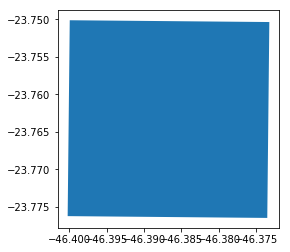

In [36]:
img_visible_satellite = gpd.GeoDataFrame(crs=POLY, geometry=[Polygon(points_t)])
with open('wkt_polygon.txt', 'w') as f:
    f.write(
        [x.wkt for x in img_visible_satellite.geometry.values][0]
    )
plt.show(img_visible_satellite.plot())

In [7]:
view = folium.Map (
    location=[-23.7661188000, -46.3800000000], 
    zoom_start=13.45
)

folium.GeoJson (
    img_visible_satellite,
    style_function=lambda feature: {
        'color': '#FF00008A'
    }
).add_to(view)
view

In [52]:
points_c = [
    (-46.38316591, -23.77018768),
    (-46.36559748, -23.77315973),
    (-46.36515407, -23.78565826),
    (-46.37767412, -23.79364209),
    (-46.38888124, -23.78597452),
    (-46.38021129, -23.78024496),
    (-46.39070815, -23.77786303),
    (-46.38797965, -23.77313614),
    (-46.38316591, -23.77018768)
]

feature_group = folium.FeatureGroup("Points")
i = 1
for point in points_c:    
    print('SELECT (ST_GeomFromText(\'POINT({} {})\'));'.format(point[0], point[1]), end='\n')
    feature_group.add_child(
        folium.Marker(
            location=point[::-1],
            popup='point '+str(i)
        )
    )
    i+=1

view.add_child(feature_group)

view

SELECT (ST_GeomFromText('POINT(-46.38316591 -23.77018768)'));
SELECT (ST_GeomFromText('POINT(-46.36559748 -23.77315973)'));
SELECT (ST_GeomFromText('POINT(-46.36515407 -23.78565826)'));
SELECT (ST_GeomFromText('POINT(-46.37767412 -23.79364209)'));
SELECT (ST_GeomFromText('POINT(-46.38888124 -23.78597452)'));
SELECT (ST_GeomFromText('POINT(-46.38021129 -23.78024496)'));
SELECT (ST_GeomFromText('POINT(-46.39070815 -23.77786303)'));
SELECT (ST_GeomFromText('POINT(-46.38797965 -23.77313614)'));
SELECT (ST_GeomFromText('POINT(-46.38316591 -23.77018768)'));


In [87]:
pts = points_o
qtd_pts = len(pts)
sigma = 0
for i in range(qtd_pts):
    cur, nex = (i%qtd_pts, (i+1)%qtd_pts)
    print(cur, nex)
    
    sigma += pts[cur][0]*pts[nex][1]-pts[cur][1]*pts[nex][0]
    
print(abs(sigma/2))

0 1
1 2
2 3
3 0
7859925.0


In [107]:
for point in points_c:
    p = Point(point)
#     print(img_visible_satellite.contains(p)[0])
    print(point, end='')
    print('não', end=' ') if not img_visible_satellite.contains(p)[0] else print(end=' ')
    print('está contido dentro da área visível do satelite!')

(-46.38316591, -23.77018768) está contido dentro da área visível do satelite!
(-46.36559748, -23.77315973)não está contido dentro da área visível do satelite!
(-46.36515407, -23.78565826)não está contido dentro da área visível do satelite!
(-46.37767412, -23.79364209)não está contido dentro da área visível do satelite!
(-46.38888124, -23.78597452)não está contido dentro da área visível do satelite!
(-46.38021129, -23.78024496)não está contido dentro da área visível do satelite!
(-46.39070815, -23.77786303)não está contido dentro da área visível do satelite!
(-46.38797965, -23.77313614) está contido dentro da área visível do satelite!
(-46.38316591, -23.77018768) está contido dentro da área visível do satelite!


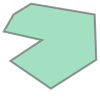

In [114]:
area_farm = gpd.GeoDataFrame(crs=POLY, geometry=[Polygon(points_c)]).geometry[0]
area_farm

In [117]:
pts = points_c
qtd_pts = len(pts)
sigma = 0
for i in range(qtd_pts):
    cur, nex = (i%qtd_pts, (i+1)%qtd_pts)
    print(cur, nex)
    
    sigma += pts[cur][0]*pts[nex][1]-pts[cur][1]*pts[nex][0]
    
print(abs(sigma/2))

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 0
0.00039281092028886633


In [119]:
farm_utm = [
    transform(EPSG2, EPSG1, point[0], point[1]) 
    for point in points_c
]
farm_utm

[(359058.1954624074, 7370521.615411476),
 (360851.7772409062, 7370209.8274442805),
 (360910.2633986745, 7368826.268327201),
 (359643.05906593875, 7367929.876411224),
 (358492.8265501368, 7368767.807457295),
 (359370.1225021092, 7369410.870973198),
 (358297.87220979144, 7369664.198120429),
 (358570.80876921036, 7370190.340539657),
 (359058.1954624074, 7370521.615411476)]

In [120]:
pts = farm_utm
qtd_pts = len(pts)
sigma = 0
for i in range(qtd_pts):
    cur, nex = (i%qtd_pts, (i+1)%qtd_pts)
    print(cur, nex)
    
    sigma += pts[cur][0]*pts[nex][1]-pts[cur][1]*pts[nex][0]
    
print(abs(sigma/2))

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 0
4432900.9453125


In [122]:
7859925.0 - 4432900.9453125

3427024.0546875

Quantas e quais câmeras ou instrumentos ele dispõe?

